In [59]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [60]:
# support functions 

df_scores = pd.DataFrame()
# Assuming you have a list of labels
labels = ['train_acc', 'test_acc', 'diff', 'r2', "mse", 'rmse']  # Replace these with your actual labels
df_scores['Description'] = labels
df_scores.set_index('Description', inplace=True)
 
def validate_model(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_predict = model.predict(X_test)
    r2 = round(r2_score(y_test,y_predict),5)
    mse = round(mean_squared_error(y_test, y_predict),4)
    rmse = round(np.sqrt(mse),4)
    return train_accuracy, test_accuracy, r2, mse, rmse
 
def collectResults( model_label, train_acc, test_acc, r2, mse, rmse):
    df_scores[model_label] = [train_acc, test_acc, abs(test_acc-train_acc),r2, mse, rmse]
     
def train_model(model, model_id,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    train_acc, test_acc, r2_acc, mse, rmse= validate_model (model,X_train, y_train, X_test, y_test)
    collectResults(model_id,train_acc,test_acc,r2_acc, mse, rmse)
    return model

In [61]:
# create a function that prepares data

def columns_by_dtype(df):
    obj_col = []
    num_col = []
    for col in df.columns:
        if df[col].dtype == 'object':
            obj_col.append(col)
        else:
            num_col.append(col) 
    return obj_col, num_col


scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
ohe.set_output(transform="pandas")

def prep_df(df, fit):
    obj_col, num_col = columns_by_dtype(df)

    if fit:
        scaler.fit(df[num_col])
        ohe.fit(df[obj_col])
    
    scaled = pd.DataFrame(data=scaler.transform(df[num_col]), columns=num_col, index=df.index)
    encoded = pd.DataFrame(data=ohe.transform(df[obj_col]), columns=ohe.get_feature_names_out(), index=df.index)
    combined = pd.concat([scaled,encoded],axis=1)

    return combined


In [62]:
# Import data
file_path = "data/online_gaming_behavior_dataset.csv"
df = pd.read_csv(file_path)

In [63]:
# assign y to EngangementLevel
le = LabelEncoder()

y = df['EngagementLevel']
X = df.drop(columns=['EngagementLevel','PlayerID'])
y_le = le.fit_transform(y)

# list classes
print(y_le)
print (le.classes_)

[2 2 0 ... 0 2 2]
['High' 'Low' 'Medium']


In [64]:
# Split the data into training and testing sets using random_state=365
X_train, X_test, y_train, y_test = train_test_split(X, y_le, random_state=365)

In [65]:
#process the model data 
X_train_processed = prep_df(X_train, True)
X_test_processed = prep_df(X_test, False)
X_test_processed

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,Location_Asia,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
28457,-0.496801,-0.784419,-0.500885,-0.775394,0.086459,-0.827296,-0.245748,0,1,1,...,0,0,0,0,0,1,0,0,1,0
2296,-0.995126,1.631747,-0.500885,1.300813,-0.464831,-1.700966,-0.870194,0,1,1,...,0,0,0,0,0,0,1,1,0,0
31547,0.699178,1.166385,-0.500885,1.300813,0.556076,0.430788,1.280674,1,0,0,...,0,1,0,1,0,0,0,0,0,1
12368,-1.692780,-1.333559,-0.500885,-0.948411,1.454474,-1.700966,0.517463,1,0,0,...,0,0,0,0,0,0,1,1,0,0
38315,-1.094791,-0.074475,1.996468,-0.429359,-1.730755,1.199617,1.627588,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,-0.596466,1.025055,-0.500885,0.954778,1.515728,0.186160,-0.037600,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1729,-1.094791,0.115974,1.996468,0.435727,1.556564,-0.827296,1.280674,1,0,0,...,0,1,0,0,0,1,0,0,1,0
24463,-0.696131,-1.059251,-0.500885,1.646847,1.352383,0.780255,-0.731428,0,1,0,...,0,0,0,1,0,0,0,1,0,0
17129,1.695828,1.359440,-0.500885,-0.775394,-0.505667,1.094776,1.488823,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [66]:
#setup models

knn_model = KNeighborsClassifier(n_neighbors=27)
lr_model = LogisticRegression(random_state=1)
svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=1,max_depth=11,criterion='entropy')
gb_model = GradientBoostingClassifier(random_state=1,max_depth=3,n_estimators=128)
ab_model = AdaBoostClassifier(random_state=1)


In [67]:
#train the models

knn_model = train_model(knn_model,"knn",X_train_processed,y_train,X_test_processed,y_test)
lr_model = train_model(lr_model, "lr",X_train_processed,y_train,X_test_processed,y_test)
svm_model = train_model(svm_model,"svm",X_train_processed,y_train,X_test_processed,y_test)
dt_model = train_model(lr_model, "dt",X_train_processed,y_train,X_test_processed,y_test)
rf_model = train_model(rf_model, "rf",X_train_processed,y_train,X_test_processed,y_test)
gb_model = train_model(gb_model, "gb",X_train_processed,y_train,X_test_processed,y_test)
ab_model = train_model(ab_model, "ab",X_train_processed,y_train,X_test_processed,y_test)
df_scores

,knn,lr,svm,dt,rf,gb,ab
Description,,,,,,,
train_acc,0.823580,0.824979,0.826211,0.824979,0.921965,0.916503,0.809359
test_acc,0.810071,0.821061,0.818763,0.821061,0.890399,0.905385,0.805375
diff,0.013509,0.003918,0.007448,0.003918,0.031566,0.011118,0.003984
r2,0.442450,0.496120,0.491490,0.496120,0.639490,0.696340,0.392250
mse,0.385100,0.348000,0.351200,0.348000,0.249000,0.209700,0.419700
rmse,0.620600,0.589900,0.592600,0.589900,0.499000,0.457900,0.647800


In [70]:
# Build out dataframe that model will use for predictions 

df_lm = pd.DataFrame(columns=X.columns)


new_row1 = {
'Age'
: 57,
'Gender'
: 'Male',
'Location'
: 'USA',
 'GameGenre'
: 'Action',
'PlayTimeHours'
: 1.5,
'InGamePurchases'
: 0,
'GameDifficulty'
: 'Medium',
'SessionsPerWeek'
: 5,
'AvgSessionDurationMinutes'
:30,
'PlayerLevel'
:10,
'AchievementsUnlocked'
:8}


new_row2 = {
'Age'
: 49,
'Gender'
: 'Male',
'Location'
: 'USA',
 'GameGenre'
: 'RPG',
'PlayTimeHours'
: 6,
'InGamePurchases'
: 0,
'GameDifficulty'
: 'Medium',
'SessionsPerWeek'
: 5,
'AvgSessionDurationMinutes'
:180,
'PlayerLevel'
:20,
'AchievementsUnlocked'
:50}

df_lm.loc[len(df_lm)] = new_row1
df_lm.loc[len(df_lm)] = new_row2

df_lm


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,57,Male,USA,Action,1.5,0,Medium,5,30,10,8
1,49,Male,USA,RPG,6.0,0,Medium,5,180,20,50


In [71]:
# Prepare the data frame
df_lm_processed = prep_df(df_lm, False)

In [72]:
# run all models against Lonnie & Mike data

y_result = {
    "knn": knn_model.predict(df_lm_processed),
    "lr": lr_model.predict(df_lm_processed),
    "svm": svm_model.predict(df_lm_processed),
    "dt": dt_model.predict(df_lm_processed),
    "rf": rf_model.predict(df_lm_processed),
    "gb": gb_model.predict(df_lm_processed),
    "ab": ab_model.predict(df_lm_processed)
    }
y_result

{'knn': array([1, 2]),
 'lr': array([1, 2]),
 'svm': array([1, 2]),
 'dt': array([1, 2]),
 'rf': array([1, 2]),
 'gb': array([1, 2]),
 'ab': array([2, 2])}

In [75]:
# lookup classes by number
items = range(0, 3, 1)
for item in items:
    print(f'{item}: ', le.inverse_transform([item]))

0:  ['High']
1:  ['Low']
2:  ['Medium']


Content below was used for optimizing models. 

In [166]:
# Optimize randomforest model

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 20, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1)
    clf.fit(X_train_combined, y_train)

    train_score = clf.score(X_train_combined, y_train)
    test_score = clf.score(X_test_combined, y_test)

    y_predict = clf.predict(X_test_combined)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df

,train,test,r2
depth,,,
1,0.480133,0.495354,-0.83266
3,0.622215,0.626736,-0.50180
5,0.789908,0.789989,0.36693
7,0.842531,0.833150,0.46415
9,0.875903,0.856729,0.50957
11,0.907577,0.874813,0.57612
13,0.932356,0.883605,0.60448
15,0.957769,0.888600,0.62560
17,0.980949,0.893196,0.64484


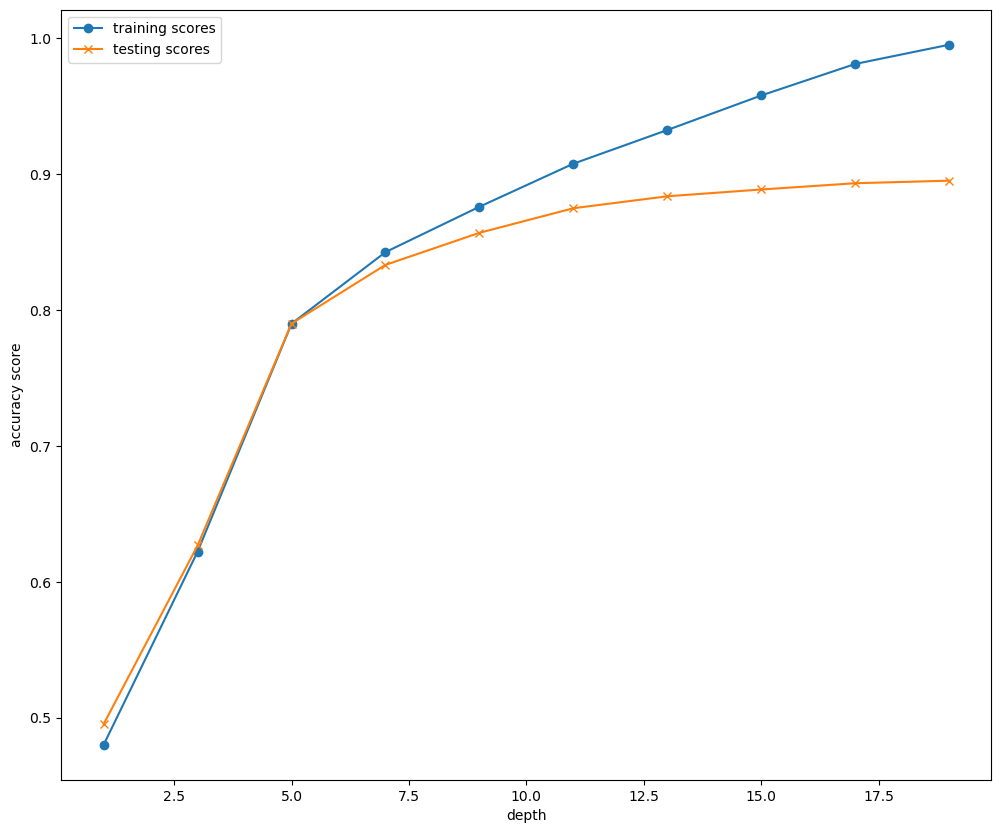

In [168]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 20, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 20, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

# Use max_depth = 11

In [169]:
# change criterion to entropy

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 20, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1, criterion='entropy')
    clf.fit(X_train_combined, y_train)

    train_score = clf.score(X_train_combined, y_train)
    test_score = clf.score(X_test_combined, y_test)

    y_predict = clf.predict(X_test_combined)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df


,train,test,r2
depth,,,
1,0.480133,0.495354,-0.83266
3,0.685096,0.693975,0.16845
5,0.786511,0.786292,0.38936
7,0.863114,0.856529,0.54791
9,0.901582,0.882606,0.61648
11,0.921965,0.890399,0.63949
13,0.939384,0.894895,0.65598
15,0.963231,0.897792,0.66495
17,0.986245,0.900090,0.67565


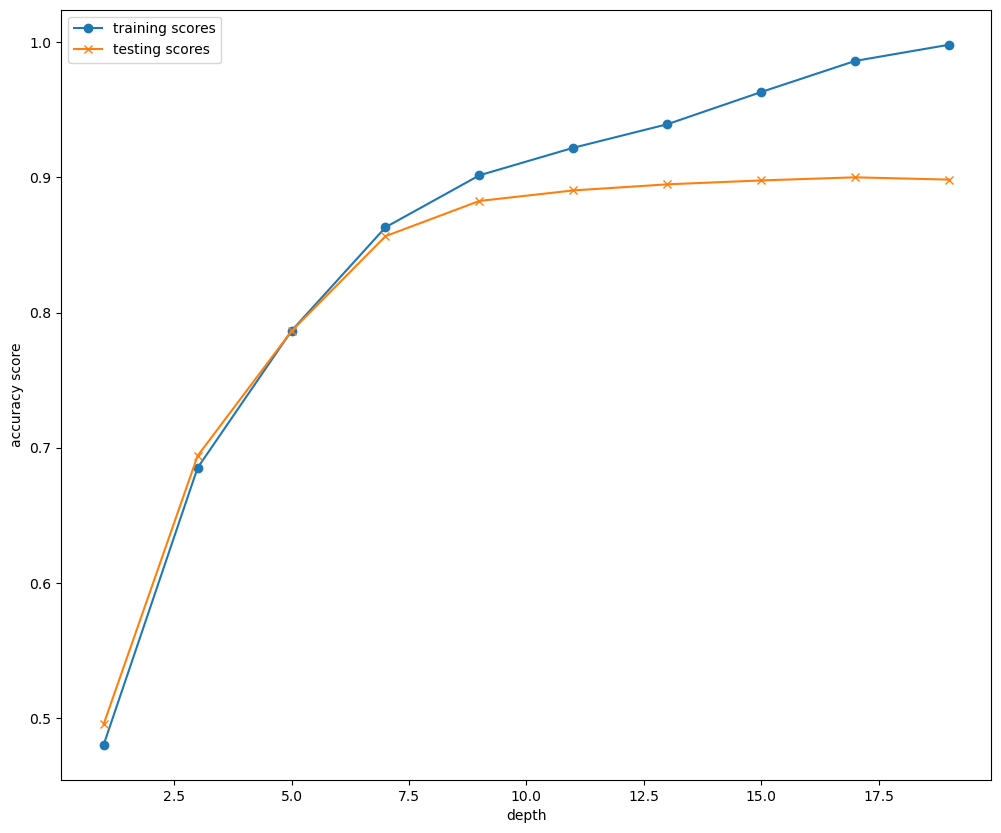

In [170]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 20, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 20, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

# use 11 max depth with criterion = entropy

In [164]:
#optimize gradient boost

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 13, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': [], 'r2' : []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = GradientBoostingClassifier(random_state=1,n_estimators=128,max_depth=depth)
    clf.fit(X_train_combined, y_train)

    train_score = clf.score(X_train_combined, y_train)
    test_score = clf.score(X_test_combined, y_test)

    y_predict = clf.predict(X_test_combined)
    r2 = round(r2_score(y_test,y_predict),5)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)
    scores['r2'].append(r2)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df

,train,test,r2
depth,,,
1,0.847127,0.840244,0.52650
3,0.916503,0.905385,0.69634
5,0.932590,0.909881,0.70719
7,0.957735,0.911679,0.71414
9,0.999134,0.912279,0.71674
11,1.000000,0.910780,0.71414


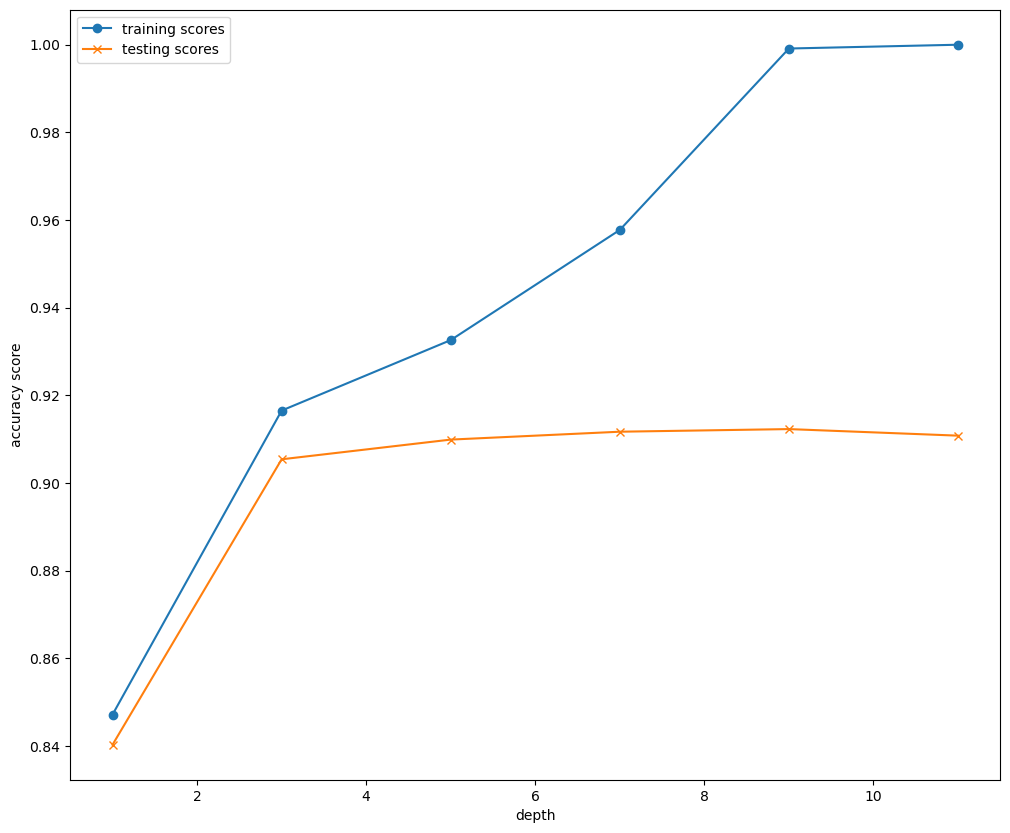

In [165]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 13, 2), scores_df['train'], marker='o', label="training scores")
plt.plot(range(1, 13, 2), scores_df['test'], marker="x", label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()